# Linear Regression on California Housing Dataset


## California Housing Dataset

The California Housing Dataset is a popular dataset used in machine learning and data analysis tasks. It contains information about housing prices and various features of houses in different districts of California.

The dataset includes features such as the median income of the district, the median house value, the average number of rooms per dwelling, the latitude and longitude of the district, and more. These features can be used to predict the median house value in a given district.

The California Housing Dataset is often used for regression tasks, where the goal is to predict a continuous value (in this case, the median house value) based on the input features. It can also be used for exploratory data analysis, feature engineering, and visualization.

The California Housing Dataset is a valuable resource for practicing and learning machine learning techniques. It provides real-world data that can be used to build predictive models and gain insights into the housing market in California.

In [1]:

# import california housing data
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

### Loading data

<Axes: >

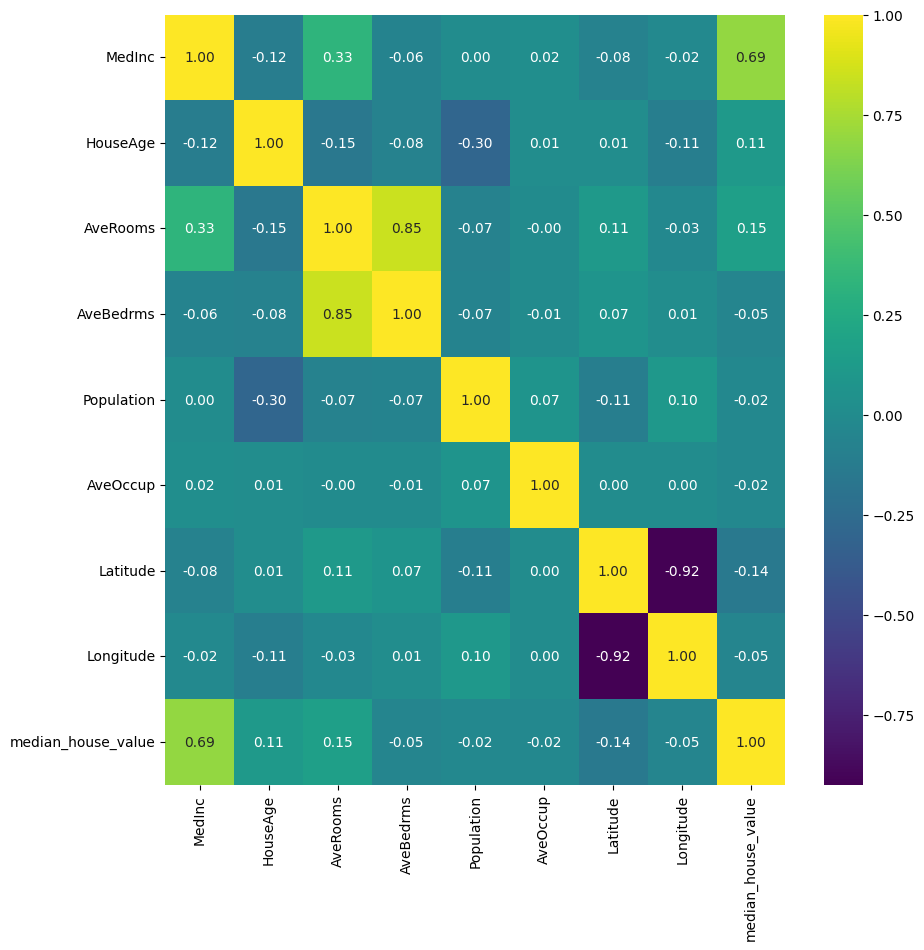

In [2]:
# load the data
california = fetch_california_housing()
X, y = california.data, california.target

# splitting data into training and testing sets
X_train_validate, X_test, y_train_validae, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# split train_validate into training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validae, test_size=0.2, random_state=33)

# create a pandas dataframe for visualization
df = pd.DataFrame(X, columns=california.feature_names)
df['median_house_value'] = y

# plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')

### Observations from the correlation matrix

1. There is a medium to strong linear relationship between Median Income and median house value
2. Presence of multicollinearity between the following variables:
    - Latitude and longitude
    - Average rooms and average bedrooms
3. The predictors that are least related to the target variable are:
    - Population
    - Avergae occupancy
    - Average Bedrooms
    - longitude


###  Data Preprocessing 


#### Standardisation



In [3]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
x_train_scaled = scaler.transform(X_train)

#### Modelling

1. Model Selection - Feed forward neural network - Multi Layer Preceptron





In [5]:
from sklearn.neural_network import MLPRegressor
mlp_regressor = MLPRegressor(verbose=True).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(mlp_regressor.score(x_train_scaled, y_train)))

# lstandardise the validation set
x_validate_scaled = scaler.transform(X_validate)
print("Validation set score: {:.2f}".format(mlp_regressor.score(x_validate_scaled, y_validate)))

# standardise the test set
x_test_scaled = scaler.transform(X_test)
print("Test set score: {:.2f}".format(mlp_regressor.score(x_test_scaled, y_test)))

Iteration 1, loss = 1.82102574
Iteration 2, loss = 0.49993339
Iteration 3, loss = 0.36006956
Iteration 4, loss = 0.31438110
Iteration 5, loss = 0.28257215
Iteration 6, loss = 0.25864769
Iteration 7, loss = 0.24085628
Iteration 8, loss = 0.22954222
Iteration 9, loss = 0.22010456
Iteration 10, loss = 0.21411212
Iteration 11, loss = 0.21101179
Iteration 12, loss = 0.20587757
Iteration 13, loss = 0.20339165
Iteration 14, loss = 0.20041441
Iteration 15, loss = 0.19624061
Iteration 16, loss = 0.19381883
Iteration 17, loss = 0.19214566
Iteration 18, loss = 0.19065676
Iteration 19, loss = 0.19055636
Iteration 20, loss = 0.18771977
Iteration 21, loss = 0.18543922
Iteration 22, loss = 0.18431159
Iteration 23, loss = 0.18296107
Iteration 24, loss = 0.18524147
Iteration 25, loss = 0.18092585
Iteration 26, loss = 0.18124975
Iteration 27, loss = 0.17942327
Iteration 28, loss = 0.17878305
Iteration 29, loss = 0.17575005
Iteration 30, loss = 0.17467703
Iteration 31, loss = 0.17478179
Iteration 32, los

#### Fine tuning the model for performance improvement



In [8]:
# fine tune the MLP regression model
mlp_regressor_fine_tuned = MLPRegressor(hidden_layer_sizes=(50, ), solver='lbfgs', verbose=True).fit(x_train_scaled, y_train)


print("Training set score: {:.2f}".format(mlp_regressor_fine_tuned.score(x_train_scaled, y_train)))

print("Validation set score: {:.2f}".format(mlp_regressor_fine_tuned.score(x_validate_scaled, y_validate)))

print("Test set score: {:.2f}".format(mlp_regressor_fine_tuned.score(x_test_scaled, y_test)))   

Training set score: 0.79
Validation set score: 0.78
Test set score: 0.80


C:\Users\ajult\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
